# Import Packages
    Import Tensorflow and the Keras classes needed to construct our model.
    Import Numpy, Random, Mathplotlib
    Import os

In [94]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras import Model
import random
print('Set-up - Imports')

Set-up - Imports


# Import Train and Test Data

In [95]:
train = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/Train')
test = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/Test')

# Understanding the Data
    How many Dog and Coyote images are in train and test folders

In [133]:
train_dog = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/Train/dog')
train_coyote = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/Train/coyote')
test_dog = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/Test/dog')
test_coyote = os.path.join('C:/Users/lmnop/Documents/TrainSetTest/Test/coyote')

print(f'Total Training Dog Images {len(os.listdir(train_dog))}')
print(f'Total Training Coyote Images {len(os.listdir(train_coyote))}')
print(f'Total Test Dog Images {len(os.listdir(test_dog))}')
print(f'Total Test Coyote Images {len(os.listdir(test_coyote))}')


Total Training Dog Images 1197
Total Training Coyote Images 743
Total Test Dog Images 250
Total Test Coyote Images 250


### Configure the matplot parameters and take a look at a few pictures

In [97]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

### Display 8 images, 4 dogs and 4 coyotes

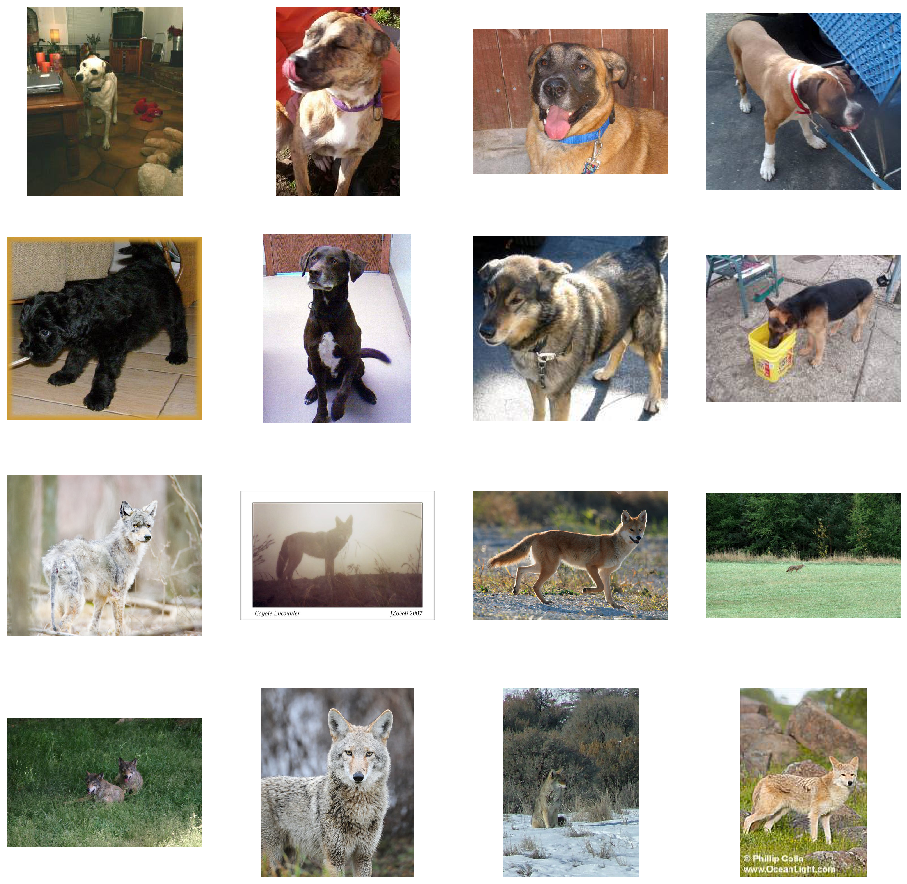

In [132]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = ['C:/Users/lmnop/Documents/TrainSetTest/Train/dog\\dog.1016.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/dog\\dog.1017.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/dog\\dog.1018.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/dog\\dog.1019.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/dog\\dog.1020.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/dog\\dog.1021.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/dog\\dog.1022.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/dog\\dog.1023.jpg']


next_dog_pix = ['C:/Users/lmnop/Documents/TrainSetTest/Train/coyote\\coyote.0.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/coyote\\coyote.1000.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/coyote\\coyote.1150.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/coyote\\coyote.707.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/coyote\\coyote.1449.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/coyote\\coyote.1635.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/coyote\\coyote.509.jpg', 
                'C:/Users/lmnop/Documents/TrainSetTest/Train/coyote\\coyote.648.jpg']


for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Creating the model 
    Resizing the images to 150 x 150, R,G,B
    We will stack 3 {convolution + relu + maxpooling} modules. 
    Our convolutions operate on 3x3 windows and our maxpooling layers operate on 2x2 windows. 
    Our first convolution extracts 16 filters, the following one extracts 32 filters, and the last one extracts 64 filters

In [99]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

#### Use flatten to make our model a binary classification problem and fully connect the layers and output the model

In [100]:
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [101]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0   

#### Train the model with the binary_crossentropy loss

In [102]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

# Data Preprocessing
    Rescaling images and training in batches of 20 using val_datagen generator

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train,  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        test,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1940 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# Training 
    

In [104]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 - 82s - loss: 0.7727 - acc: 0.6150 - val_loss: 0.6023 - val_acc: 0.6920
Epoch 2/15
100/100 - 81s - loss: 0.5439 - acc: 0.7365 - val_loss: 0.4987 - val_acc: 0.7670
Epoch 3/15
100/100 - 99s - loss: 0.4829 - acc: 0.7860 - val_loss: 0.5785 - val_acc: 0.7440
Epoch 4/15
100/100 - 68s - loss: 0.3815 - acc: 0.8350 - val_loss: 0.4327 - val_acc: 0.8170
Epoch 5/15
100/100 - 65s - loss: 0.3471 - acc: 0.8535 - val_loss: 0.5046 - val_acc: 0.7960
Epoch 6/15
100/100 - 60s - loss: 0.2540 - acc: 0.9030 - val_loss: 0.4154 - val_acc: 0.8570
Epoch 7/15
100/100 - 60s - loss: 0.2179 - acc: 0.9135 - val_loss: 0.5151 - val_acc: 0.8400
Epoch 8/15
100/100 - 58s - loss: 0.1531 - acc: 0.9460 - val_loss: 0.4891 - val_acc: 0.8430
Epoch 9/15
100/100 - 59s - loss: 0.1169 - acc: 0.9540 - val_loss: 0.6569 - val_acc: 0.8360
Epoch 10/15
100/100 - 61s - loss: 0.1067 - acc: 0.9665 - val_loss: 0.6190 - val_acc: 0.8400
Epoch 11/15
1

# Visualizing Intermediate Representations

C:\Users\lmnop\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


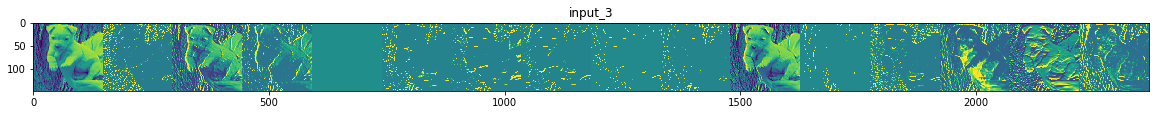

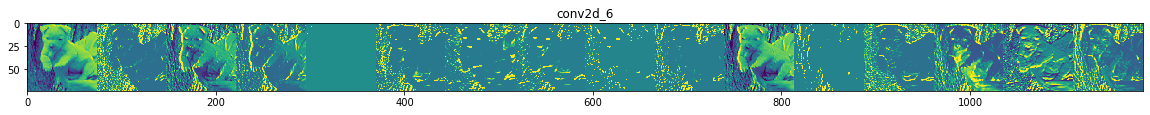

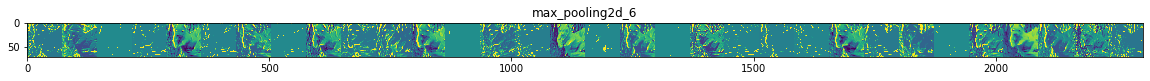

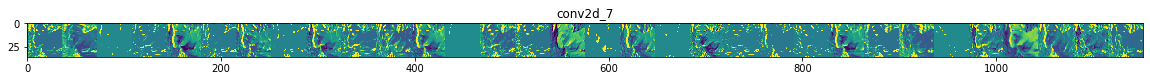

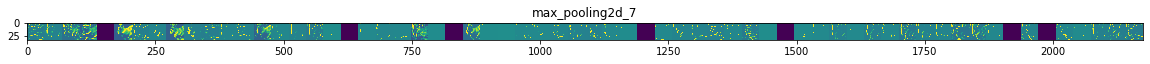

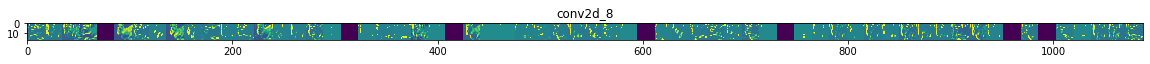

In [107]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

cat_img_files = [os.path.join(train_dog, f) for f in dog_train_fnames]
dog_img_files = [os.path.join(train_coyote, f) for f in coyote_train_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Evaluating Accuracy and Loss for the Model

Text(0.5, 1.0, 'Training and validation loss')

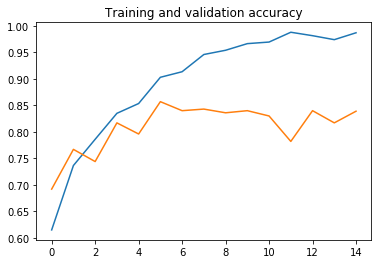

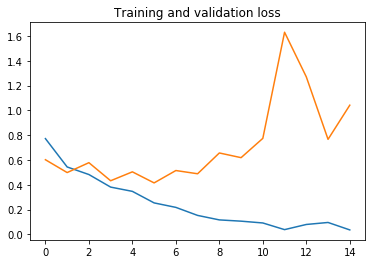

In [108]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# Prevent Overfitting
    using data augmentation and add dropout to our model.

### Apply horizontal flip

In [109]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [110]:
train_data_gen = image_gen.flow_from_directory(batch_size=128,
                                               directory=train,
                                               shuffle=True,
                                               target_size=(150, 150))

Found 1940 images belonging to 2 classes.


In [111]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [112]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

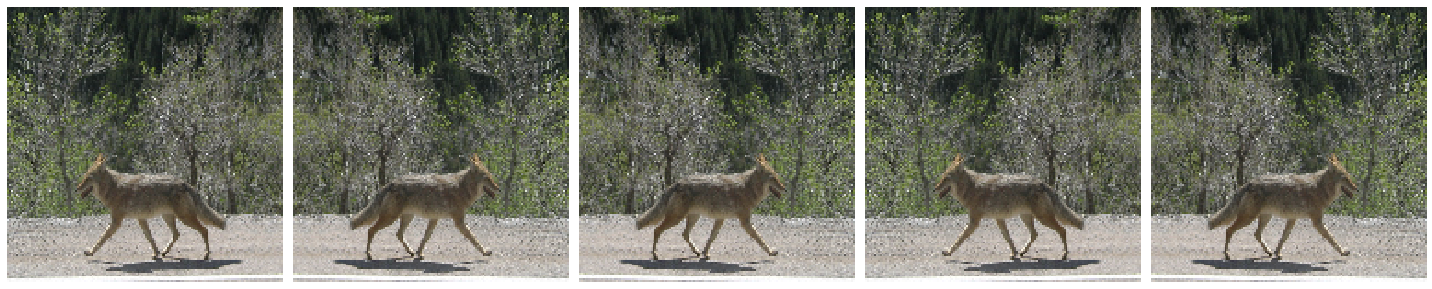

In [113]:
plotImages(augmented_images)

### Apply zoom augmentation

In [114]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [115]:
train_data_gen = image_gen.flow_from_directory(batch_size=128,
                                               directory=train,
                                               shuffle=True,
                                               target_size=(150, 150))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 1940 images belonging to 2 classes.


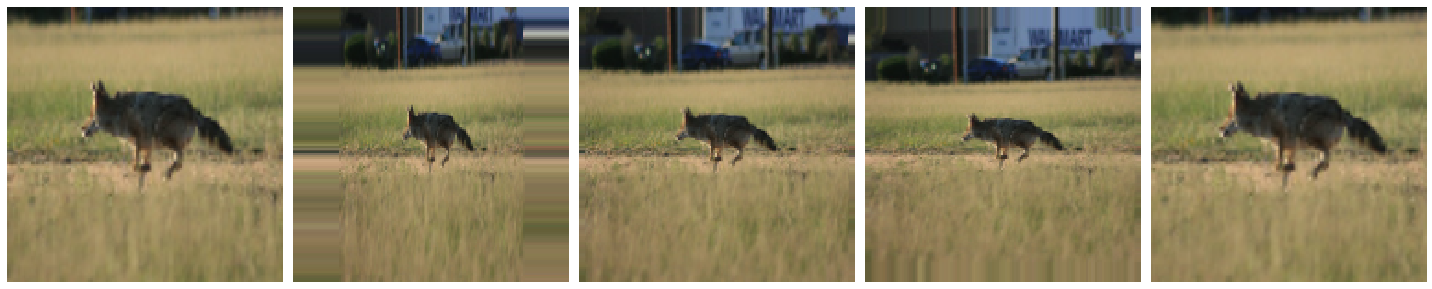

In [116]:
plotImages(augmented_images)

### Put it all together

In [117]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [118]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=128,
                                                     directory=train,
                                                     shuffle=True,
                                                     target_size=(150, 150),
                                                     class_mode='binary')

Found 1940 images belonging to 2 classes.


### Visualize how a single image would look five different times when passing these augmentations randomly to the dataset. 

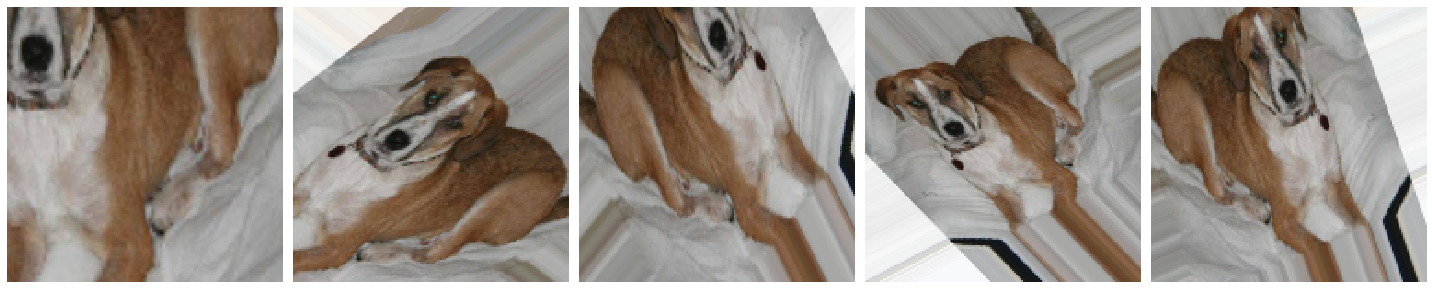

In [119]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Create validation data generator

In [120]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [121]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=128,
                                                 directory=test,
                                                 target_size=(150, 150),
                                                 class_mode='binary')

Found 500 images belonging to 2 classes.


### Creating a Network with Dropouts

In [122]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

### Compile the model

In [123]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0   

### Train the model

In [124]:
history = model_new.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 69s - loss: 0.8086 - accuracy: 0.4985 - val_loss: 0.6713 - val_accuracy: 0.5310
Epoch 2/15
100/100 - 65s - loss: 0.5683 - accuracy: 0.7115 - val_loss: 0.5831 - val_accuracy: 0.7400
Epoch 3/15
100/100 - 62s - loss: 0.4761 - accuracy: 0.7710 - val_loss: 0.4974 - val_accuracy: 0.7700
Epoch 4/15
100/100 - 63s - loss: 0.4113 - accuracy: 0.8070 - val_loss: 0.4568 - val_accuracy: 0.8240
Epoch 5/15
100/100 - 72s - loss: 0.3786 - accuracy: 0.8220 - val_loss: 0.4862 - val_accuracy: 0.8060
Epoch 6/15
100/100 - 71s - loss: 0.3447 - accuracy: 0.8450 - val_loss: 0.5707 - val_accuracy: 0.7750
Epoch 7/15
100/100 - 73s - loss: 0.2825 - accuracy: 0.8775 - val_loss: 0.4172 - val_accuracy: 0.7980
Epoch 8/15
100/100 - 75s - loss: 0.2368 - accuracy: 0.9050 - val_loss: 0.4534 - val_accuracy: 0.8360
Epoch 9/15
100/100 - 83s - loss: 0.1918 - accuracy: 0.9235 - val_loss: 0.5572 - val_accuracy: 0.8050
Epoch 10/15
100/100 - 71s - loss: 0.1610 - accuracy: 0.9360 - val_loss: 0.6246 - val_accura

# Final Evaluating Accuracy and Loss for the Model

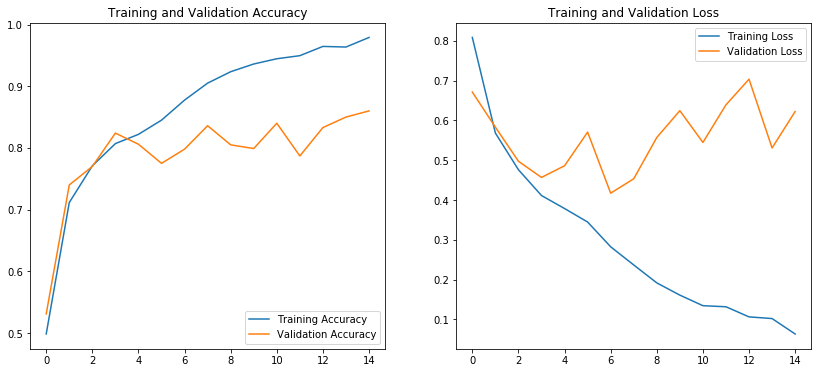

In [125]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()